In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Load data
df=pd.read_csv('Stores.csv')
df

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1,1659,1961,530,66490
1,2,1461,1752,210,39820
2,3,1340,1609,720,54010
3,4,1451,1748,620,53730
4,5,1770,2111,450,46620
...,...,...,...,...,...
891,892,1582,1910,1080,66390
892,893,1387,1663,850,82080
893,894,1200,1436,1060,76440
894,895,1299,1560,770,96610


In [18]:
# Check for missing values
print(df.isnull().sum())

Store ID                0
Store_Area              0
Items_Available         0
Daily_Customer_Count    0
Store_Sales             0
dtype: int64


In [19]:
# Fill missing values or drop rows/columns as needed
df.dropna(inplace=True)  # or use data.fillna(value)

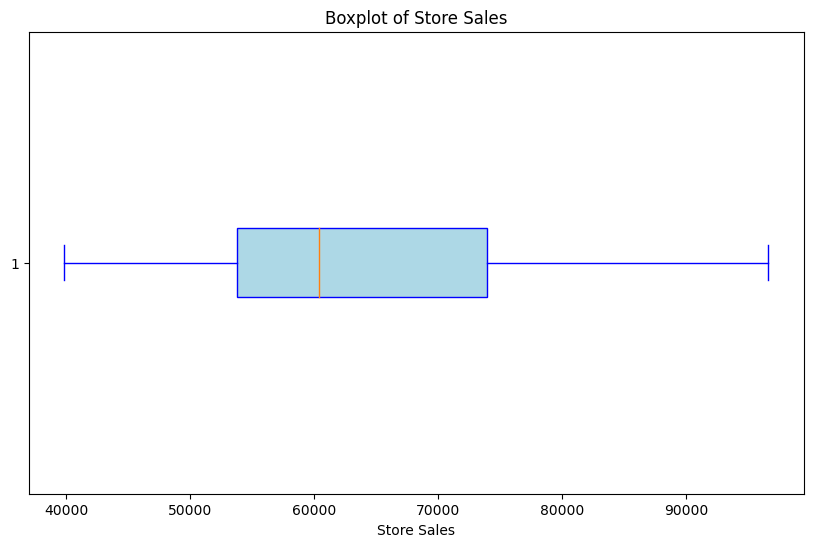

Lower Bound: 23571.25
Upper Bound: 104181.25
Outliers:
Empty DataFrame
Columns: [Store_ID, Store_Area, Items_Available, Daily_Customer_Count, Store_Sales]
Index: []


In [55]:
#Boxplot-finding outliers
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Sample data for illustration
data = pd.DataFrame({
    'Store_ID': [1, 2, 3, 4, 5, 892, 893, 894, 895, 896],
    'Store_Area': [1659, 1461, 1340, 1451, 1770, 1582, 1387, 1200, 1299, 1174],
    'Items_Available': [1961, 1752, 1609, 1748, 2111, 1910, 1663, 1436, 1560, 1429],
    'Daily_Customer_Count': [530, 210, 720, 620, 450, 1080, 850, 1060, 770, 1110],
    'Store_Sales': [66490, 39820, 54010, 53730, 46620, 66390, 82080, 76440, 96610, 54340]
})

# Draw the boxplot
plt.figure(figsize=(10, 6))
plt.boxplot(data['Store_Sales'], vert=False, patch_artist=True, 
            boxprops=dict(facecolor='lightblue', color='blue'), 
            whiskerprops=dict(color='blue'), 
            capprops=dict(color='blue'), 
            flierprops=dict(markerfacecolor='red', marker='o'))
plt.xlabel('Store Sales')
plt.title('Boxplot of Store Sales')
plt.show()

# Find outliers
Q1 = data['Store_Sales'].quantile(0.25)
Q3 = data['Store_Sales'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = data[(data['Store_Sales'] < lower_bound) | (data['Store_Sales'] > upper_bound)]

print(f'Lower Bound: {lower_bound}')
print(f'Upper Bound: {upper_bound}')
print('Outliers:')
print(outliers)

In [22]:
# Convert data types if necessary
df['Store_Area'] = pd.to_numeric(df['Store_Area'], errors='coerce')
df['Daily_Customer_Count'] = pd.to_numeric(df['Daily_Customer_Count'], errors='coerce')
df['Store_Sales'] = pd.to_numeric(df['Store_Sales'], errors='coerce')

In [24]:
# Create new features
df['Sales_per_Customer'] = df['Store_Sales'] / df['Daily_Customer_Count']
df['Sales_per_Square_Meter'] = df['Store_Sales'] / df['Store_Area']

In [28]:
#incorporating missing values to the data
# Set a random seed for reproducibility
np.random.seed(42)

# Introduce missing values randomly
def introduce_missing_values(df, columns, missing_rate=0.1):
    """ Introduce missing values into specified columns of the dataframe """
    for column in columns:
        # Calculate the number of missing values to introduce
        num_missing = int(len(df) * missing_rate)
        # Randomly select indices to set as missing
        missing_indices = np.random.choice(df.index, num_missing, replace=False)
        # Introduce missing values
        df.loc[missing_indices, column] = np.nan

# Specify columns to introduce missing values
columns_to_modify = ['Store_Area', 'Items_Available', 'Daily_Customer_Count', 'Store_Sales']

# Introduce missing values with a rate of 10%
introduce_missing_values(df, columns_to_modify, missing_rate=0.1)

# Display the data with missing values
print("\nData with Missing Values:")
print(df.head())


Data with Missing Values:
   Store ID   Store_Area  Items_Available  Daily_Customer_Count  Store_Sales  \
0          1      1659.0           1961.0                 530.0      66490.0   
1          2      1461.0           1752.0                 210.0      39820.0   
2          3      1340.0           1609.0                 720.0      54010.0   
3          4      1451.0           1748.0                 620.0      53730.0   
4          5      1770.0           2111.0                 450.0      46620.0   

   Sales_per_Customer  Sales_per_Square_Meter  
0          125.452830               40.078360  
1          189.619048               27.255305  
2           75.013889               40.305970  
3           86.661290               37.029635  
4          103.600000               26.338983  


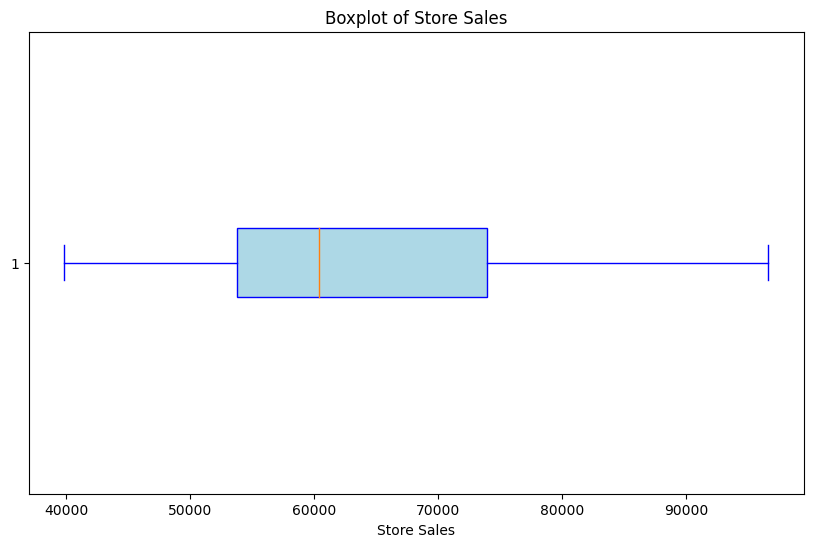

Lower Bound: 23571.25
Upper Bound: 104181.25
Outliers:
Empty DataFrame
Columns: [Store_ID, Store_Area, Items_Available, Daily_Customer_Count, Store_Sales]
Index: []


In [56]:
#Again looking at outliers and interquartile range
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Sample data for illustration
data = pd.DataFrame({
    'Store_ID': [1, 2, 3, 4, 5, 892, 893, 894, 895, 896],
    'Store_Area': [1659, 1461, 1340, 1451, 1770, 1582, 1387, 1200, 1299, 1174],
    'Items_Available': [1961, 1752, 1609, 1748, 2111, 1910, 1663, 1436, 1560, 1429],
    'Daily_Customer_Count': [530, 210, 720, 620, 450, 1080, 850, 1060, 770, 1110],
    'Store_Sales': [66490, 39820, 54010, 53730, 46620, 66390, 82080, 76440, 96610, 54340]
})

# Draw the boxplot
plt.figure(figsize=(10, 6))
plt.boxplot(data['Store_Sales'], vert=False, patch_artist=True, 
            boxprops=dict(facecolor='lightblue', color='blue'), 
            whiskerprops=dict(color='blue'), 
            capprops=dict(color='blue'), 
            flierprops=dict(markerfacecolor='red', marker='o'))
plt.xlabel('Store Sales')
plt.title('Boxplot of Store Sales')
plt.show()

# Find outliers
Q1 = data['Store_Sales'].quantile(0.25)
Q3 = data['Store_Sales'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = data[(data['Store_Sales'] < lower_bound) | (data['Store_Sales'] > upper_bound)]

print(f'Lower Bound: {lower_bound}')
print(f'Upper Bound: {upper_bound}')
print('Outliers:')
print(outliers)

In [29]:
#Data Pre-processing/cleaning
# Check for missing values
print("\nMissing Values Count:")
print(df.isnull().sum())


Missing Values Count:
Store ID                   0
Store_Area                89
Items_Available           89
Daily_Customer_Count      89
Store_Sales               89
Sales_per_Customer         0
Sales_per_Square_Meter     0
dtype: int64


In [30]:
# Drop rows with missing values
data_dropped = df.dropna()
print("\nData after Dropping Missing Values:")
print(data_dropped.head())


Data after Dropping Missing Values:
   Store ID   Store_Area  Items_Available  Daily_Customer_Count  Store_Sales  \
0          1      1659.0           1961.0                 530.0      66490.0   
1          2      1461.0           1752.0                 210.0      39820.0   
2          3      1340.0           1609.0                 720.0      54010.0   
3          4      1451.0           1748.0                 620.0      53730.0   
4          5      1770.0           2111.0                 450.0      46620.0   

   Sales_per_Customer  Sales_per_Square_Meter  
0          125.452830               40.078360  
1          189.619048               27.255305  
2           75.013889               40.305970  
3           86.661290               37.029635  
4          103.600000               26.338983  


In [32]:
# Fill missing values with mean
data_filled_mean = df.fillna(df.mean(numeric_only=True))
print("\nData after Filling Missing Values with Mean:")
print(data_filled_mean.head())


Data after Filling Missing Values with Mean:
   Store ID   Store_Area  Items_Available  Daily_Customer_Count  Store_Sales  \
0          1      1659.0           1961.0                 530.0      66490.0   
1          2      1461.0           1752.0                 210.0      39820.0   
2          3      1340.0           1609.0                 720.0      54010.0   
3          4      1451.0           1748.0                 620.0      53730.0   
4          5      1770.0           2111.0                 450.0      46620.0   

   Sales_per_Customer  Sales_per_Square_Meter  
0          125.452830               40.078360  
1          189.619048               27.255305  
2           75.013889               40.305970  
3           86.661290               37.029635  
4          103.600000               26.338983  


In [33]:
# Fill missing values with median
data_filled_median = df.fillna(df.median(numeric_only=True))
print("\nData after Filling Missing Values with Median:")
print(data_filled_median.head())


Data after Filling Missing Values with Median:
   Store ID   Store_Area  Items_Available  Daily_Customer_Count  Store_Sales  \
0          1      1659.0           1961.0                 530.0      66490.0   
1          2      1461.0           1752.0                 210.0      39820.0   
2          3      1340.0           1609.0                 720.0      54010.0   
3          4      1451.0           1748.0                 620.0      53730.0   
4          5      1770.0           2111.0                 450.0      46620.0   

   Sales_per_Customer  Sales_per_Square_Meter  
0          125.452830               40.078360  
1          189.619048               27.255305  
2           75.013889               40.305970  
3           86.661290               37.029635  
4          103.600000               26.338983  


In [34]:
# Fill missing values with a specific value (e.g., 0)
data_filled_zero = df.fillna(0)
print("\nData after Filling Missing Values with 0:")
print(data_filled_zero.head())


Data after Filling Missing Values with 0:
   Store ID   Store_Area  Items_Available  Daily_Customer_Count  Store_Sales  \
0          1      1659.0           1961.0                 530.0      66490.0   
1          2      1461.0           1752.0                 210.0      39820.0   
2          3      1340.0           1609.0                 720.0      54010.0   
3          4      1451.0           1748.0                 620.0      53730.0   
4          5      1770.0           2111.0                 450.0      46620.0   

   Sales_per_Customer  Sales_per_Square_Meter  
0          125.452830               40.078360  
1          189.619048               27.255305  
2           75.013889               40.305970  
3           86.661290               37.029635  
4          103.600000               26.338983  


Descriptive Statistics:
        Store ID    Store_Area  Items_Available  Daily_Customer_Count  \
count  896.000000   896.000000       896.000000            896.000000   
mean   448.500000  1485.409598      1782.035714            786.350446   
std    258.797218   250.237011       299.872053            265.389281   
min      1.000000   775.000000       932.000000             10.000000   
25%    224.750000  1316.750000      1575.500000            600.000000   
50%    448.500000  1477.000000      1773.500000            780.000000   
75%    672.250000  1653.500000      1982.750000            970.000000   
max    896.000000  2229.000000      2667.000000           1560.000000   

         Store_Sales  
count     896.000000  
mean    59351.305804  
std     17190.741895  
min     14920.000000  
25%     46530.000000  
50%     58605.000000  
75%     71872.500000  
max    116320.000000  


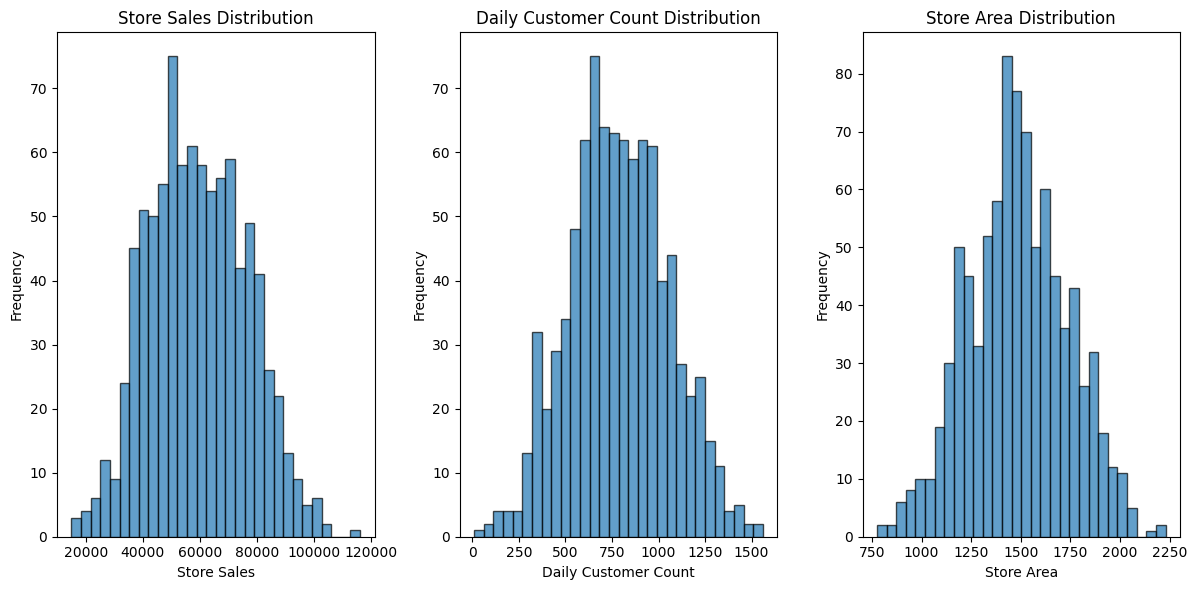

In [42]:
#Exploratory Data Analysis(EDA)
# Descriptive Statistics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data
df=pd.read_csv('Stores.csv')

# Descriptive Statistics
print("Descriptive Statistics:")
print(df.describe())

# Histograms using matplotlib
plt.figure(figsize=(12, 6))

# Histogram for Store Sales
plt.subplot(1, 3, 1)
plt.hist(df['Store_Sales'].dropna(), bins=30, edgecolor='k', alpha=0.7)
plt.title('Store Sales Distribution')
plt.xlabel('Store Sales')
plt.ylabel('Frequency')

# Histogram for Daily Customer Count
plt.subplot(1, 3, 2)
plt.hist(df['Daily_Customer_Count'].dropna(), bins=30, edgecolor='k', alpha=0.7)
plt.title('Daily Customer Count Distribution')
plt.xlabel('Daily Customer Count')
plt.ylabel('Frequency')

# Histogram for Store Area
plt.subplot(1, 3, 3)
plt.hist(df['Store_Area'].dropna(), bins=30, edgecolor='k', alpha=0.7)
plt.title('Store Area Distribution')
plt.xlabel('Store Area')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

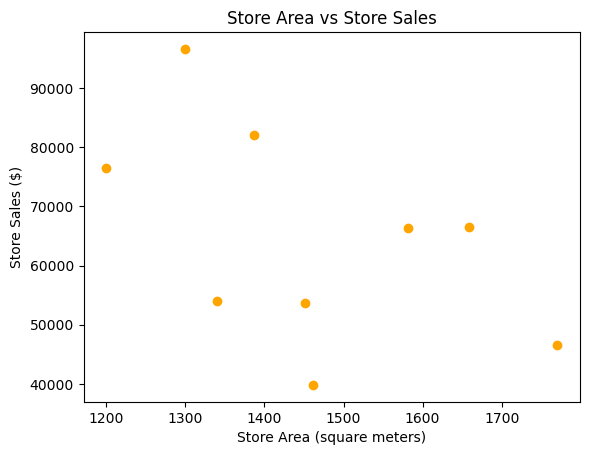

In [44]:
# Scatter plots
import matplotlib.pyplot as plt
import pandas as pd

# Sample data as a dictionary
data = {
    'Store_ID': [1, 2, 3, 4, 5, 892, 893, 894, 895],
    'Store_Area': [1659, 1461, 1340, 1451, 1770, 1582, 1387, 1200, 1299],
    'Items_Available': [1961, 1752, 1609, 1748, 2111, 1910, 1663, 1436, 1560],
    'Daily_Customer_Count': [530, 210, 720, 620, 450, 1080, 850, 1060, 770],
    'Store_Sales': [66490, 39820, 54010, 53730, 46620, 66390, 82080, 76440, 96610]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Create a scatter plot
plt.scatter(df['Store_Area'], df['Store_Sales'], color='orange')

# Add titles and labels
plt.title('Store Area vs Store Sales')
plt.xlabel('Store Area (square meters)')
plt.ylabel('Store Sales ($)')

# Show the plot
plt.show()

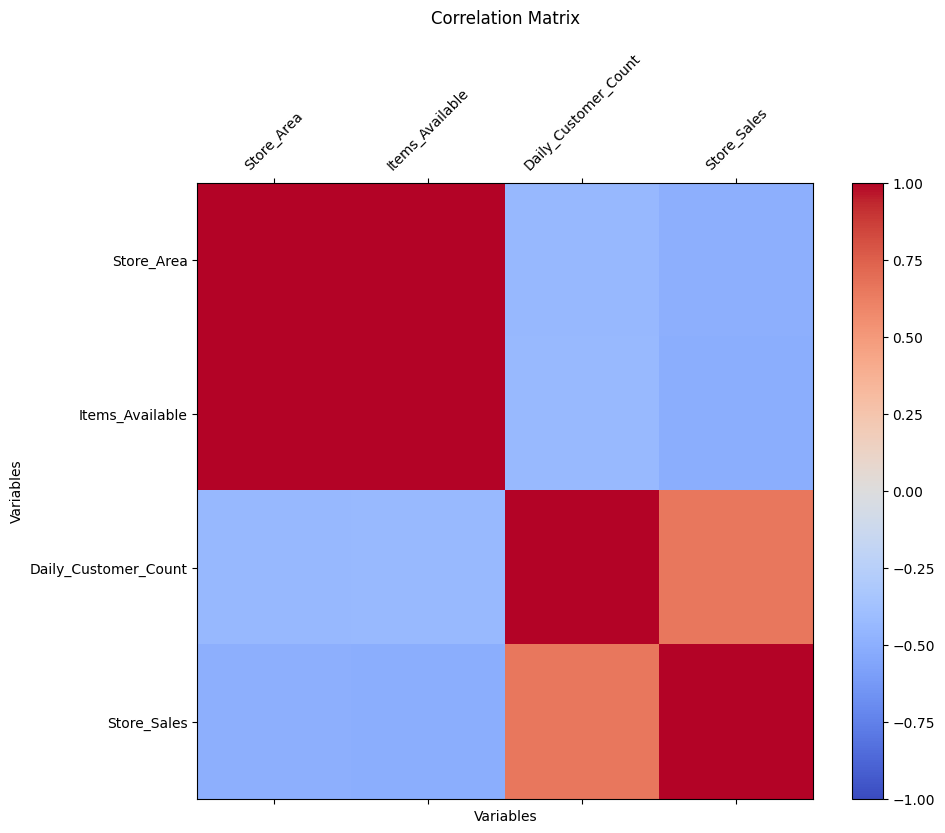

In [47]:
#Correlation matrix-Heatmap
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Sample data as a dictionary
data = {
    'Store_ID': [1, 2, 3, 4, 5, 892, 893, 894, 895],
    'Store_Area': [1659, 1461, 1340, 1451, 1770, 1582, 1387, 1200, 1299],
    'Items_Available': [1961, 1752, 1609, 1748, 2111, 1910, 1663, 1436, 1560],
    'Daily_Customer_Count': [530, 210, 720, 620, 450, 1080, 850, 1060, 770],
    'Store_Sales': [66490, 39820, 54010, 53730, 46620, 66390, 82080, 76440, 96610]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Compute the correlation matrix
correlation_matrix = df[['Store_Area', 'Items_Available', 'Daily_Customer_Count', 'Store_Sales']].corr()

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 8))

# Create a heatmap
cax = ax.matshow(correlation_matrix, cmap='coolwarm', vmin=-1, vmax=1)

# Add colorbar
fig.colorbar(cax)

# Add labels
ax.set_xticks(np.arange(len(correlation_matrix.columns)))
ax.set_yticks(np.arange(len(correlation_matrix.columns)))
ax.set_xticklabels(correlation_matrix.columns)
ax.set_yticklabels(correlation_matrix.columns)

# Rotate the x labels
plt.xticks(rotation=45)

# Add titles
plt.title('Correlation Matrix', pad=20)
plt.xlabel('Variables')
plt.ylabel('Variables')

# Show the plot
plt.show()

In [50]:
#Linear regression
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Example DataFrame
data = pd.DataFrame({
    'Store_Area': np.random.rand(100) * 1000,  # Random data for illustration
    'Items_Available': np.random.randint(10, 100, 100),
    'Daily_Customer_Count': np.random.randint(100, 1000, 100),
    'Store_Sales': np.random.rand(100) * 5000
})

# Features and target variable
X = data[['Store_Area', 'Items_Available', 'Daily_Customer_Count']]
y = data['Store_Sales']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Inspect model parameters
print(f'Coefficients: {model.coef_}')
print(f'Intercept: {model.intercept_}')

Mean Squared Error: 2606839.9013049575
Coefficients: [-0.87504685 -5.4203732   0.59449389]
Intercept: 2918.9774622515024


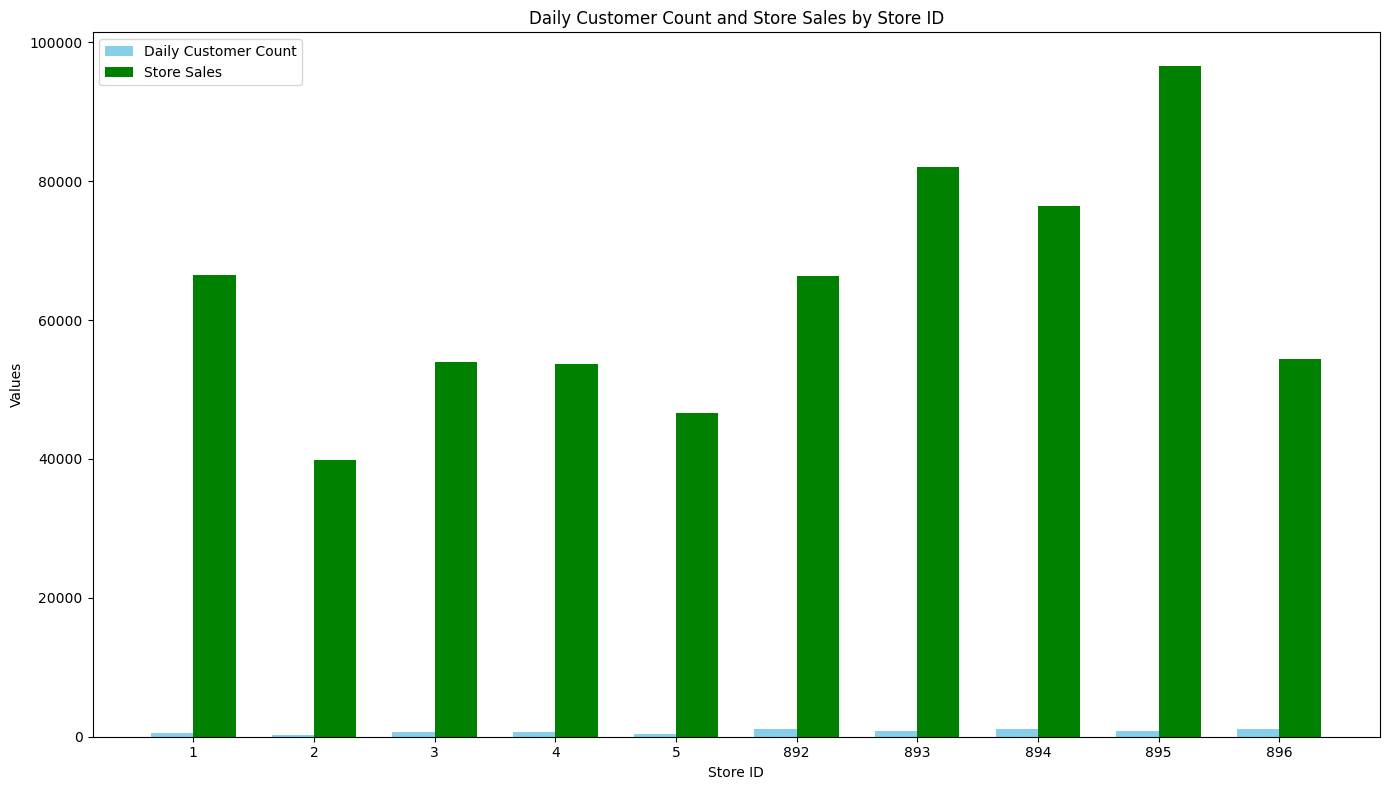

In [53]:
#Visualization-Bar plot
import matplotlib.pyplot as plt
import pandas as pd

# Sample data for illustration
data = pd.DataFrame({
    'Store_ID': [1, 2, 3, 4, 5, 892, 893, 894, 895, 896],
    'Daily_Customer_Count': [530, 210, 720, 620, 450, 1080, 850, 1060, 770, 1110],
    'Store_Sales': [66490, 39820, 54010, 53730, 46620, 66390, 82080, 76440, 96610, 54340]
})

# Set up the figure and axis
plt.figure(figsize=(14, 8))

# Define width of bars
bar_width = 0.35

# Define positions for bars
r1 = range(len(data['Store_ID']))  # positions for first set of bars
r2 = [x + bar_width for x in r1]  # positions for second set of bars

# Plot Daily Customer Count
plt.bar(r1, data['Daily_Customer_Count'], color='skyblue', width=bar_width, label='Daily Customer Count')

# Plot Store Sales
plt.bar(r2, data['Store_Sales'], color='green', width=bar_width, label='Store Sales')

# Add labels, title, and legend
plt.xlabel('Store ID')
plt.ylabel('Values')
plt.title('Daily Customer Count and Store Sales by Store ID')
plt.xticks([r + bar_width / 2 for r in r1], data['Store_ID'])  # Align x-axis ticks
plt.legend()

# Show plot
plt.tight_layout()  # Adjust layout
plt.show()

In [54]:
#Getting accuracy score
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Sample data for illustration
data = pd.DataFrame({
    'Store_ID': [1, 2, 3, 4, 5, 892, 893, 894, 895, 896],
    'Store_Area': [1659, 1461, 1340, 1451, 1770, 1582, 1387, 1200, 1299, 1174],
    'Items_Available': [1961, 1752, 1609, 1748, 2111, 1910, 1663, 1436, 1560, 1429],
    'Daily_Customer_Count': [530, 210, 720, 620, 450, 1080, 850, 1060, 770, 1110],
    'Store_Sales': [66490, 39820, 54010, 53730, 46620, 66390, 82080, 76440, 96610, 54340]
})

# Features and target variable
X = data[['Store_Area', 'Items_Available', 'Daily_Customer_Count']]
y = data['Store_Sales']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Compute R-squared
r2 = r2_score(y_test, y_pred)

# Convert R-squared to percentage
r2_percentage = r2 * 100

print(f'R-squared: {r2:.4f}')
print(f'R-squared Percentage: {r2_percentage:.2f}%')

from sklearn.metrics import accuracy_score

# Example for classification
y_true = [0, 1, 0, 1]
y_pred = [0, 1, 0, 0]

accuracy = accuracy_score(y_true, y_pred)
accuracy_percentage = accuracy * 100

print(f'Accuracy Score: {accuracy:.4f}')
print(f'Accuracy Percentage: {accuracy_percentage:.2f}%')

R-squared: 0.1710
R-squared Percentage: 17.10%
Accuracy Score: 0.7500
Accuracy Percentage: 75.00%
